In [5]:
import pandas as pd
data= pd.read_csv("Cust_Segmentation.csv")
print(data)


     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  
0          0.0  NBA001           

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D as ax
from sklearn.metrics import pairwise_distances_argmin_min

features = data [['Age','Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]
scaler = StandardScaler()
X = scaler.fit_transform(features)

kmeans_euclidean = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_euclidean = kmeans_euclidean.fit_predict(X)

from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(X, metric='manhattan')
kmeans_manhattan = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_manhattan = kmeans_manhattan.fit_predict(distance_matrix)

data['Cluster_Eculidean'] = labels_euclidean
data['Cluster_Manhattan'] = labels_manhattan

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


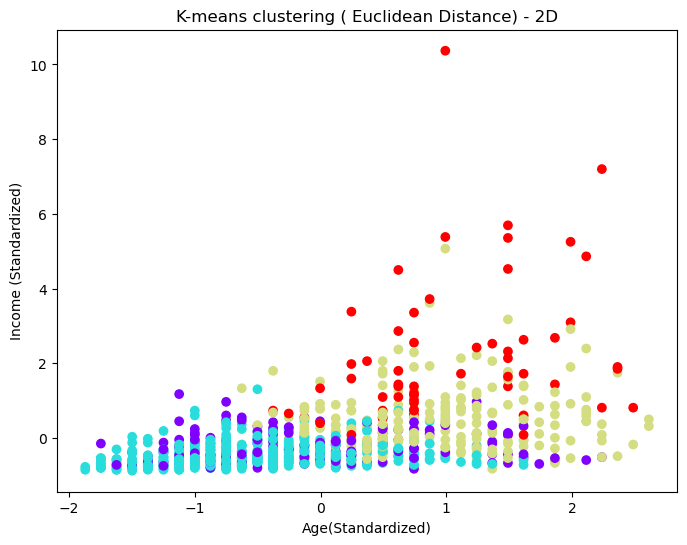

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:,3], c=labels_euclidean, cmap='rainbow')
plt.title("K-means clustering ( Euclidean Distance) - 2D")
plt.xlabel("Age(Standardized)")
plt.ylabel("Income (Standardized)")
plt.show()


TypeError: 'Text' object is not callable

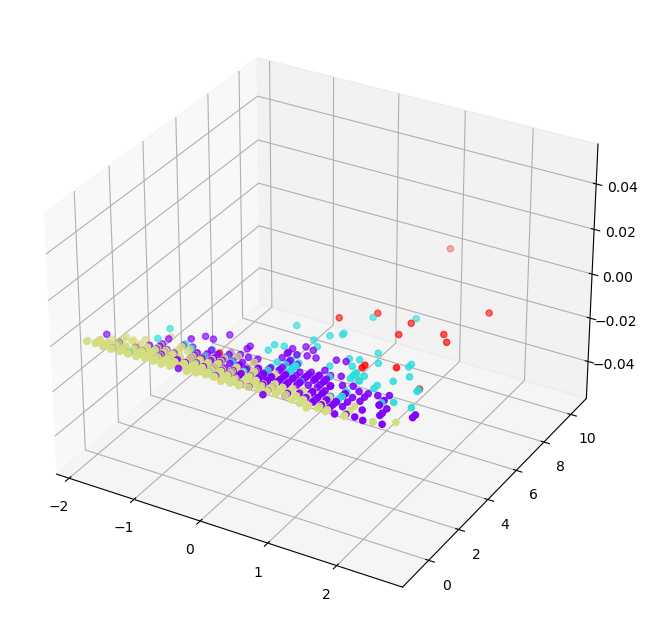

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(X[:, 0], X[:,3], c=labels_manhattan, cmap='rainbow')
ax.title("K-means clustering ( manhattan Distance) - 3D")
ax.xlabel("Age")
ax.ylabel("Income")
ax.set_zlabel("card dept")